In [3]:
pip install tensorflow matplotlib


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [5]:
#load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train/255.0, x_test/255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
#build neural network
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),      # Convert 2D images to 1D
    layers.Dense(128, activation='relu'),     # Hidden layer
    layers.Dense(10, activation='softmax')   # Output layer for 10 digits
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8682 - loss: 0.4635 - val_accuracy: 0.9658 - val_loss: 0.1265
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9634 - loss: 0.1232 - val_accuracy: 0.9707 - val_loss: 0.1047
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9761 - loss: 0.0826 - val_accuracy: 0.9762 - val_loss: 0.0796
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9813 - loss: 0.0613 - val_accuracy: 0.9772 - val_loss: 0.0814
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9866 - loss: 0.0433 - val_accuracy: 0.9773 - val_loss: 0.0797


In [8]:
#evualate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0916
Test Accuracy: 0.9753999710083008


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted digit: 7


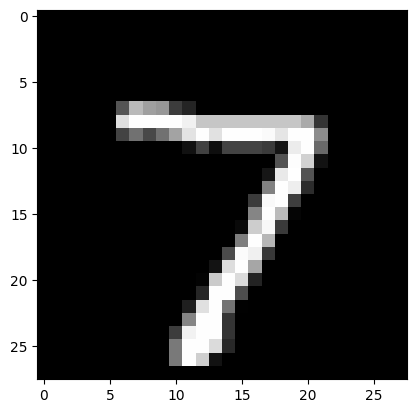

In [9]:
#prediction
predictions = model.predict(x_test)
import numpy as np

# Example prediction
print("Predicted digit:", np.argmax(predictions[0]))

# Show the image
plt.imshow(x_test[0], cmap='gray')
plt.show()



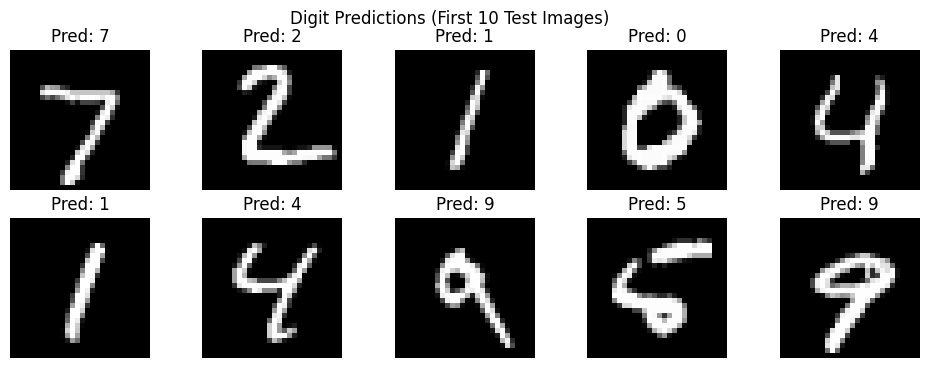

In [10]:
#first 10 preiction
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,4))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.suptitle("Digit Predictions (First 10 Test Images)")
plt.show()


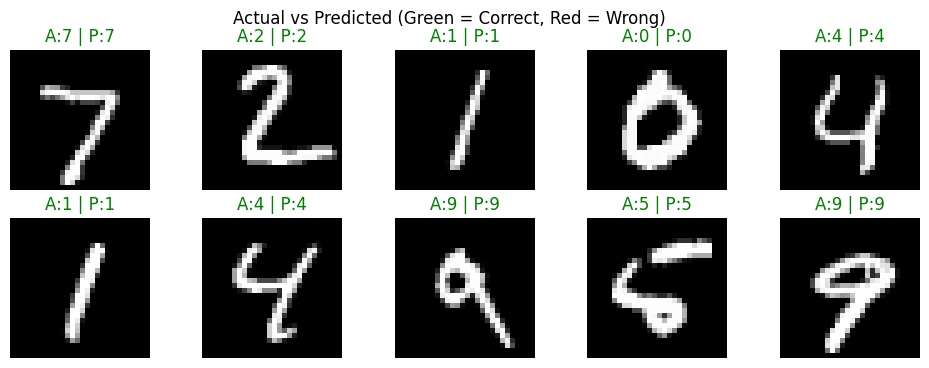

In [12]:
#comparing actual vs predicted
plt.figure(figsize=(12,4))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')

    actual = y_test[i]
    predicted = np.argmax(predictions[i])

    color = "green" if actual == predicted else "red"

    plt.title(f"A:{actual} | P:{predicted}", color=color)
    plt.axis('off')

plt.suptitle("Actual vs Predicted (Green = Correct, Red = Wrong)")
plt.show()

